In [67]:
%matplotlib inline
import numpy as np
import scipy
from scipy.signal import hilbert, chirp, spectrogram, periodogram
import matplotlib.pyplot as plt

fs = 1e3
periods = 2
freq = 1

# Reference implementation

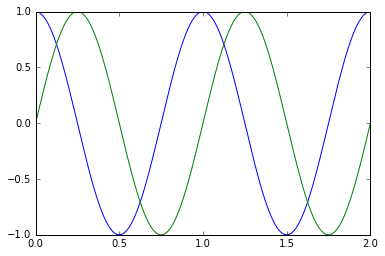

In [68]:
# phase_incremet = 2*np.pi*freq / fs
# time = np.arange(0, time_end*fs*phase_incremet, phase_incremet)
time = np.linspace(0, periods, fs*periods, endpoint=False) # NB! NOTICE ENDPOINT, TO MATCH GNURADIO

phase_angle = 2*np.pi*freq*time*1j
ref = np.exp(phase_angle)
# ref = np.exp(time*1j)
plt.plot(time, ref.real,time, ref.imag)

# CORDIC exp

In [70]:
def cordic_exp(phase, phase_lut):
    y = 0
    x = 1 / 1.646760
    for i, adj in enumerate(phase_lut):
        sign = -1 if phase < 0 else 1
        x, y, phase = x - sign * (y * (2 ** -i)), y + sign * (x * (2 ** -i)), phase - sign * adj

    return x + 1j * y

cordic_len = 18
phase_lut = [np.arctan(2 ** -i) for i in range(cordic_len)]

phase_incremet = 2*np.pi*freq / fs
from hwpy.common.cordic import CORDIC

lol = CORDIC(18)
ph = 0
sign = 1
res = []
for x in range(int(fs*periods)):
    ph += phase_incremet
    if ph > np.pi/2: # cordic only works from -pi/2 to pi/2
        ph -= np.pi 
        sign *= -1 # need to sign invert 2,3 quadrant

    res.append(sign * cordic_exp(ph, phase_lut))

plt.plot([x.real for x in res])
plt.plot([x.imag for x in res])
plt.show()
    

TypeError: object() takes no parameters

# Compare

In [ ]:
np.testing.assert_almost_equal(res[:-1], ref[1:], decimal=5)

Numpy and CORDIC results is time shifted in one sample, why??